<a href="https://www.kaggle.com/code/sahilr05/tabular-playground-series-eda-feature-engineer?scriptVersionId=105334321" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import minmax_scale
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression,Lasso,Ridge,ARDRegression ,HuberRegressor,PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-sep-2022/train.csv
/kaggle/input/tabular-playground-series-sep-2022/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/train.csv")
test = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/test.csv")

In [3]:
data.head(3)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480


In [4]:
data.shape

(70128, 6)

In [5]:
for i in data[["country","store","product"]]:
    print(data[i].value_counts())
    print("===========================")

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64
KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64
Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64


<AxesSubplot:xlabel='store', ylabel='num_sold'>

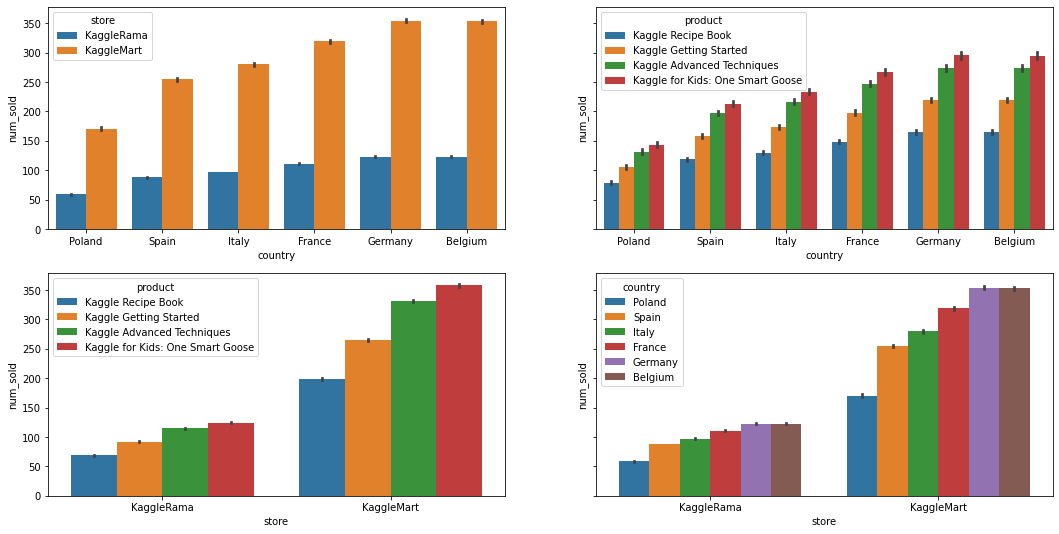

In [6]:
fig, (axis1,axis2) = plt.subplots(2,2,figsize=(18,9),sharey=True)
sns.barplot(data=data.sort_values(by="num_sold"),x="country",hue="store",y="num_sold",ax=axis1[0])
sns.barplot(data=data.sort_values(by="num_sold"),x="country",hue="product",y="num_sold",ax=axis1[1])
sns.barplot(data=data.sort_values(by="num_sold"),x="store",hue="product",y="num_sold",ax=axis2[0])
sns.barplot(data=data.sort_values(by="num_sold"),x="store",hue="country",y="num_sold",ax=axis2[1])

1. **Store**
* KaggleMart sale more then kaggleRama - KaggleMart > kaggleRama
* lowest sale in Poland
* highest sold in Belgium

2. **Product**
- kaggle recipe Book sold less then other Product
- kaggle for kids highest sold in all country 

In [7]:
data["date"] = pd.to_datetime(data["date"])

In [8]:
data["day"] = data["date"].dt.day
data["month"] = data["date"].dt.month
data["year"] = data["date"].dt.year
data["weekday"] = data["date"].dt.dayofweek
data["month_start"] = data["date"].dt.is_month_start.apply(lambda x: 0 if(x==True) else 1)
data["month_end"] = data["date"].dt.is_month_end.apply(lambda x: 0 if(x==True) else 1)

<AxesSubplot:xlabel='month_end', ylabel='num_sold'>

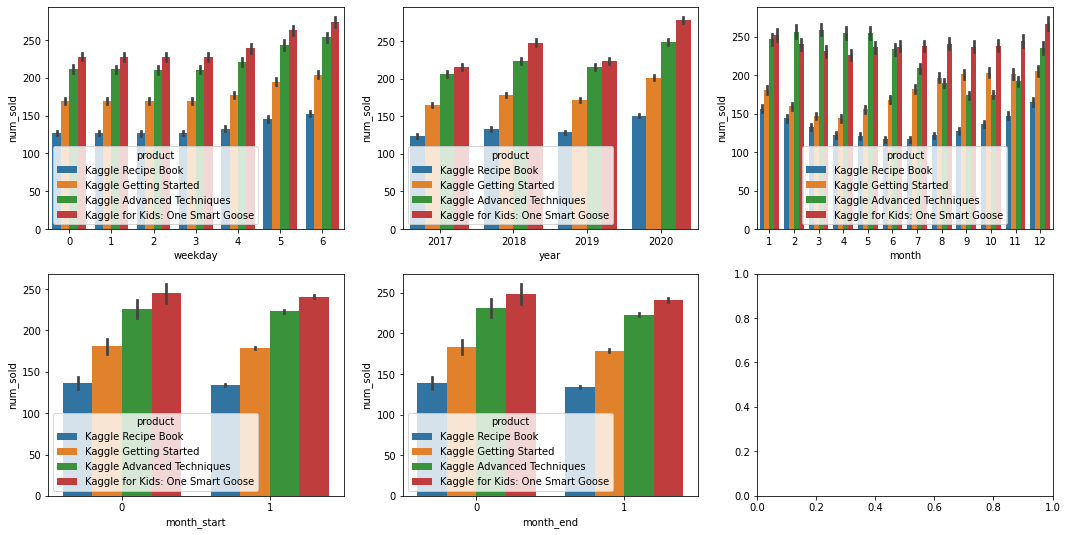

In [9]:
fig , (ax1,ax2) = plt.subplots(2,3,figsize=(18,9))
sns.barplot(data=data.sort_values(by="num_sold"),x="weekday",y="num_sold",hue="product",ax=ax1[0])
sns.barplot(data=data.sort_values(by="num_sold"),x="year",y="num_sold",hue="product",ax=ax1[1])
sns.barplot(data=data.sort_values(by="num_sold"),x="month",y="num_sold",hue="product",ax=ax1[2])
sns.barplot(data=data.sort_values(by="num_sold"),x="month_start",y="num_sold",hue="product",ax=ax2[0])
sns.barplot(data=data.sort_values(by="num_sold"),x="month_end",y="num_sold",hue="product",ax=ax2[1])

1. more sale in Weekend which is 5 & 6
2. 2020 grow sale
3. 1 to 5 Month Kaggle Advanced Tehnique Have More Sold then 6 to 12 month kaggle kids more Sold
4. month_start & month_end day sold no more diffrences

In [10]:
x = data.drop(["num_sold","row_id","date"],axis=1)
y = data["num_sold"]

In [11]:
x_train,x_test, y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=2)
x_train.shape, x_test.shape

((49089, 9), (21039, 9))

In [12]:
x_train.head(2)

,country,store,product,day,month,year,weekday,month_start,month_end
25063,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,7,6,2018,3,1,1
53507,Poland,KaggleMart,Kaggle for Kids: One Smart Goose,20,1,2020,0,1,1


In [13]:
encode =  OneHotEncoder()
encode.fit(x_train[["country","store","product"]])

OneHotEncoder()

In [14]:
col_trans = make_column_transformer(
                            (OneHotEncoder(categories=encode.categories_),["country","store","product"]),
                            remainder="passthrough")

In [15]:
# Linear Models
lr = LinearRegression()
log = LogisticRegression()
lasso = Lasso()
ridge = Ridge()
ardr = ARDRegression()
hr = HuberRegressor()
par = PassiveAggressiveRegressor()
linear_models = [lr,log,lasso,ridge,ardr,hr,par]

# Ensemble Models
rdf = RandomForestRegressor()
br = BaggingRegressor()
gbr = GradientBoostingRegressor()
ensemble_models = [rdf,br,gbr]

In [16]:
for i in linear_models:
    pipe = make_pipeline(col_trans,i)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(i)
    print(pipe.score(x_train,y_train))
    print(pipe.score(x_test,y_test))
    print(r2_score(y_test,y_pred))
    print(mean_absolute_error(y_test,y_pred))
    print(mean_squared_error(y_test,y_pred))
    print("=====================================")

LinearRegression()
0.7959392794881611
0.7899263203978664
0.7899263203978664
42.84435071811925
3378.4502209318575


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()
0.006824339465053271
0.005038262274822948
-0.6702216996867139
116.01563762536242
26860.86558296497
Lasso()
0.7923370081800103
0.7863457299146607
0.7863457299146607
42.36737163954001
3436.0340492913333
Ridge()
0.7959392760893522
0.7899267130322936
0.7899267130322936
42.8435067666935
3378.4439065003216
ARDRegression()
0.7959351054230417
0.7899357328545181
0.7899357328545181
42.83966742222219
3378.298847774045


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()
0.7239995414904168
0.7171559237241388
0.7171559237241388
47.21329104178125
4548.759434276815
PassiveAggressiveRegressor()
0.5623178041560042
0.5531368974118516
0.5531368974118516
72.72531948803424
7186.548788617933


In [17]:
for i in ensemble_models:
    pipe = make_pipeline(col_trans,i)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(i)
    print(pipe.score(x_train,y_train))
    print(pipe.score(x_test,y_test))
    print(r2_score(y_test,y_pred))
    print(mean_absolute_error(y_test,y_pred))
    print(mean_squared_error(y_test,y_pred))
    print("=====================================")

RandomForestRegressor()
0.9975996943603583
0.9821322365310116
0.9821322365310116
10.391082275773563
287.3532255620515
BaggingRegressor()
0.9966656230108768
0.980575180224806
0.980575180224806
10.804092399828889
312.3941408812206
GradientBoostingRegressor()
0.9487868381861178
0.9468366648378449
0.9468366648378449
18.813154271879966
854.984221556107


In [18]:
knn = KNeighborsRegressor()
pipe = make_pipeline(col_trans,knn)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(knn)
print(pipe.score(x_train,y_train))
print(pipe.score(x_test,y_test))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print("=====================================")

KNeighborsRegressor()
0.8817093962978716
0.838607978543998
0.838607978543998
37.76144303436475
2595.541295688958


In [19]:
# Take Much More Time & Ram 


# rdf = RandomForestRegressor()
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# rdfs = RandomizedSearchCV(rdf,random_grid,n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# pipe = make_pipeline(col_trans,rdfs)
# pipe.fit(x_train,y_train)
# y_pred = pipe.predict(x_test)
# print(rdfs)
# print(pipe.score(x_train,y_train))
# print(pipe.score(x_test,y_test))
# print(r2_score(y_test,y_pred))
# print(mean_absolute_error(y_test,y_pred))
# print(mean_squared_error(y_test,y_pred))
# print("=====================================")

In [20]:
pipe = make_pipeline(col_trans,rdf)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(rdf)
print(pipe.score(x_train,y_train))
print(pipe.score(x_test,y_test))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print("=====================================")

RandomForestRegressor()
0.997570051256738
0.9821484628167768
0.9821484628167768
10.388253243975475
287.09227093493035


In [21]:
test.drop(["row_id"],inplace=True,axis=1)
test["date"] = pd.to_datetime(test["date"])
test["day"] = test["date"].dt.day
test["month"] = test["date"].dt.month
test["year"] = test["date"].dt.year
test["weekday"] = test["date"].dt.dayofweek
test["month_start"] = test["date"].dt.is_month_start.apply(lambda x: 0 if(x==True) else 1)
test["month_end"] = test["date"].dt.is_month_end.apply(lambda x: 0 if(x==True) else 1)
test.drop(["date"],inplace=True,axis=1)

In [22]:
num_sold = pipe.predict(test)

In [23]:
submission = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv")
submission["num_sold"]= num_sold
submission.head()
submission.to_csv("submission.csv",index=False)

In [24]:
pd.read_csv("./submission.csv")

,row_id,num_sold
0,70128,482.59
1,70129,388.36
2,70130,338.41
3,70131,534.64
4,70132,171.65
...,...,...
17515,87643,556.55
17516,87644,188.11
17517,87645,164.48
17518,87646,132.57
